<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Project2</h3>
</div>

<img src = "https://slitayem.github.io/img/blog/2020-08-04/churn.png" width=50%>

## Importing the libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
import xgboost as sgb 
from sklearn.impute import SimpleImputer
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from xgboost import XGBClassifier as XGB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')

## Load and Prepare Data

In [2]:
cust = pd.read_csv("Churn.csv")

## EDA

In [3]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
cust.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
cust.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Data Preprocessing

In [6]:
cust.drop(columns=['RowNumber','CustomerId','Surname','Tenure'], axis = 1, inplace=True)

In [7]:
cust['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [8]:
cust['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [9]:
cust.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,125510.82,1,1,1,79084.10,0


In [10]:
x = cust[(cust.Balance == 0)]
x.shape

(3617, 10)

In [11]:
cust.replace({'Geography':{'France':0, 'Spain':1, 'Germany':2}}, inplace=True)

In [12]:
cust.replace({'Gender':{'Female':0, 'Male':1}}, inplace=True)

In [13]:
cust.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,0.00,1,1,1,101348.88,1
1,608,1,0,41,83807.86,1,0,1,112542.58,0
2,502,0,0,42,159660.80,3,1,0,113931.57,1
3,699,0,0,39,0.00,2,0,0,93826.63,0
4,850,1,0,43,125510.82,1,1,1,79084.10,0


## Strorytelling - Visualization

In [14]:
cr = cust['CreditScore'].head(100)
ex = cust['Exited'].head(100)
ge = cust['Gender'].head(100)

<AxesSubplot:xlabel='CreditScore', ylabel='Exited'>

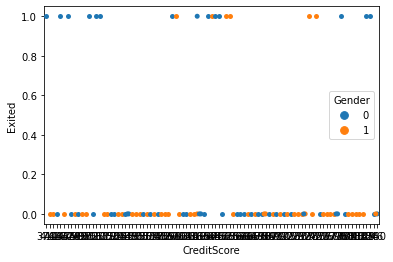

In [15]:
sns.swarmplot(x = cr, y = ex, hue = ge , data=cust)

<AxesSubplot:xlabel='Geography', ylabel='Exited'>

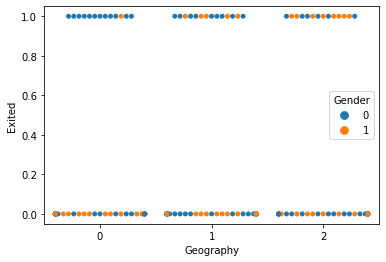

In [16]:
geo = cust['Geography'].head(200)
exi = cust['Exited'].head(200)
gen = cust['Gender'].head(200)
sns.swarmplot(x = geo, y = exi, hue = gen , data=cust)

## Train your model

In [20]:
x = cust.drop(columns=['Exited'], axis=True)
x = x.head(500)
y = cust['Exited']
y = y.head(500)

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# Feature Scaling

In [24]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## Test the model and show the metrics

In [32]:
model = XGB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

[21:04:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [34]:
accuracy = accuracy_score(y_test, y_pred)*100
accuracy

81.33333333333333

In [47]:
val = np.array([0.01, -1.46, -1.06, 0.74, 1.11, -0.86, -1.65, 1.02, -1.75]).reshape(1,9)
val.shape
test = model.predict(val)

In [48]:
test

array([1])

## Send us the Result (Maktabkhoone)